In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import psycopg2

In [3]:
host = 'localhost'
username = 'postgres'
password = 'postgres'
database = 'books'

conn = psycopg2.connect(
    host=host,
    database=database,
    user=username,
    password=password
)

cursor = conn.cursor()

In [5]:
books = pd.read_sql_query(con=conn, sql='SELECT * FROM lubimyczytac.books')

In [7]:
books.sample(5)

,book_id,book_url,title,author,author_url,series,series_url,title_org,publisher,publication_date,...,rate_8,rate_7,rate_6,rate_5,rate_4,rate_3,rate_2,rate_1,status_datetime,category
39098,116541,https://lubimyczytac.pl/ksiazka/116541/auschwitz,Auschwitz,Pascal Croci,https://lubimyczytac.pl/autor/57842/pascal-croci,None,None,None,Norma Editorial,2003-01-01,...,1,3,8,5,0,0,0,0,2021-12-02 12:43:18.367109,komiksy
10616,252265,https://lubimyczytac.pl/ksiazka/252265/ulica-m...,Ulica Milczenia. Tom 1,Ann Cleeves,https://lubimyczytac.pl/autor/14046/ann-cleeves,Vera Stanhope (tom 6.1),https://lubimyczytac.pl/cykl/1072/vera-stanhope,Harbour Street,Amber,2015-04-10,...,18,43,40,2,1,4,0,0,2021-11-30 19:30:21.785573,"kryminał, sensacja, thriller"
79763,4954406,https://lubimyczytac.pl/ksiazka/4954406/dlacze...,Dlaczego liberalizm zawiódł?,Patrick J. Deneen,https://lubimyczytac.pl/autor/165697/patrick-j...,Biblioteka Myśli Współczesnej,https://lubimyczytac.pl/seria/862/biblioteka-m...,Why Liberalism Failed,Państwowy Instytut Wydawniczy,2021-03-10,...,3,1,1,1,1,0,0,0,2021-11-29 12:55:56.950638,None
80811,36216,https://lubimyczytac.pl/ksiazka/36216/kobieta-...,Kobieta i mężczyźni,Manuela Gretkowska,https://lubimyczytac.pl/autor/17581/manuela-gr...,Nowa proza polska,https://lubimyczytac.pl/seria/815/nowa-proza-p...,None,Świat Książki,2007-01-01,...,42,187,189,196,48,61,17,20,2021-11-30 00:48:02.721418,literatura piękna
55078,212579,https://lubimyczytac.pl/ksiazka/212579/emilka-...,Emilka Piórko i tajemnicze lustro,Holly Webb,https://lubimyczytac.pl/autor/39275/holly-webb,None,None,None,Znak emotikon,2014-03-31,...,4,4,4,1,0,0,0,0,2021-12-02 08:44:30.531403,literatura dziecięca


In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98457 entries, 0 to 98456
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   book_id                        98457 non-null  int64         
 1   book_url                       98457 non-null  object        
 2   title                          98457 non-null  object        
 3   author                         98183 non-null  object        
 4   author_url                     98183 non-null  object        
 5   series                         47259 non-null  object        
 6   series_url                     47259 non-null  object        
 7   title_org                      54919 non-null  object        
 8   publisher                      97827 non-null  object        
 9   publication_date               98457 non-null  object        
 10  first_publication_date_poland  93897 non-null  object        
 11  first_publicati

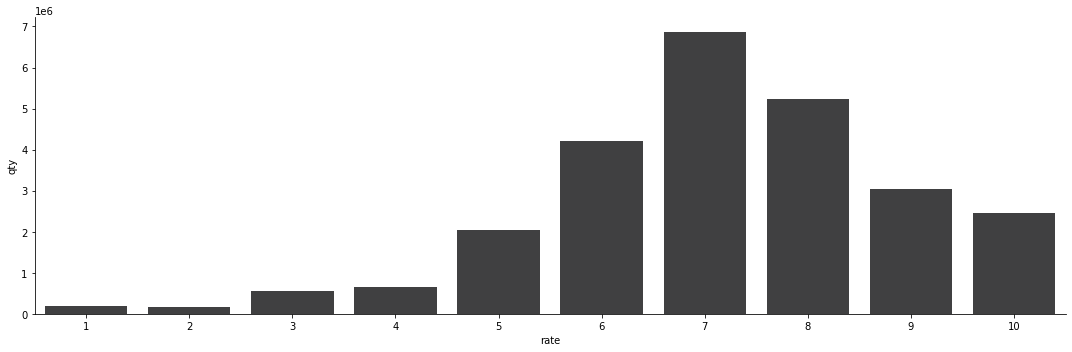

,qty,pct
rate,,
1,177857,0.01
2,165013,0.01
3,545983,0.02
4,659867,0.03
5,2034437,0.08
6,4201889,0.17
7,6876930,0.27
8,5226794,0.21
9,3041498,0.12


In [47]:
rates_cols = [col for col in books.columns if col.startswith('rate_')]
rates_qties = books[rates_cols].sum().to_frame().reset_index()
rates_qties.columns = ['rate', 'qty']
rates_qties['rate'] = rates_qties['rate'].apply(lambda row: int(row[5:]))
rates_qties.set_index('rate', inplace=True)
rates_qties['pct'] = rates_qties['qty'] / rates_qties['qty'].sum()
sns.catplot(
    data=rates_qties.reset_index(),
    x='rate',
    y='qty',
    kind='bar',
    aspect=3,
    color='#404041'
)
plt.show()

rates_qties.sort_index().round(2)